### Figures for the benchmarks between the algorithms for 1d functions.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Force imported libraries and modules to auto-reload
%load_ext autoreload
%autoreload 2

from tools import merge_pkl, read_field, create_subplots

DATA_PATH = "data/"
SHOW_FIGURES = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load TCI results

In [14]:
# Set parameter ranges
range_n = range(2, 25 + 1)
range_r = range(2, 30 + 1, 2)
range_t = [10 ** -(exp) for exp in range(1, 14 + 1)]

# Set fixed parameters
fixed_n = 25
fixed_r = 50
fixed_t = 1e-14

# Load results
params_r = {"n": fixed_n, "r": range_r, "t": fixed_t}
data_r_g = merge_pkl(params_r, name="cross_1d_gaussian", path=DATA_PATH)
data_r_o = merge_pkl(params_r, name="cross_1d_osc", path=DATA_PATH)
data_r_a = merge_pkl(params_r, name="cross_1d_abs", path=DATA_PATH)
data_r_s = merge_pkl(params_r, name="cross_1d_step", path=DATA_PATH)

Load Chebyshev results

In [15]:
# fmt: off
# Set parameter ranges
range_n = list(range(2, 25 + 1))
range_d = list(range(2, 10)) + list(range(10, 100, 10)) + list(range(100, 1300 + 1, 100))
range_t = [10 ** -(exp) for exp in range(1, 14 + 1)]

# Set fixed parameters
fixed_n = 25
fixed_d = 1300
fixed_t = 1e-14
max_d_g = 50

# Load results
range_d_g = np.array(range_d)[np.array(range_d) <= max_d_g]
params_d = {"n": fixed_n, "d": range_d_g, "t": fixed_t}
data_d_g = merge_pkl(params_d, name="chebyshev_1d_gaussian", path=DATA_PATH)
params_d["d"] = range_d
data_d_o = merge_pkl(params_d, name="chebyshev_1d_osc", path=DATA_PATH)
data_d_a = merge_pkl(params_d, name="chebyshev_1d_step", path=DATA_PATH)
data_d_s = merge_pkl(params_d, name="chebyshev_1d_abs", path=DATA_PATH)

Load Lagrange results

In [16]:
params_d = {"n": fixed_n, "d": range_d, "t": fixed_t}
data_d = merge_pkl(params_d, name="lagrange_osc", path=DATA_PATH)

In [17]:
# fmt: off
from copy import copy
from tools import set_plot_parameters

set_plot_parameters()

# TCI styles
STYLE_G = {"linestyle": "solid", "marker": None, "color": "tab:blue"}
STYLE_G_CHEB = copy(STYLE_G)
STYLE_G_CROSS = copy(STYLE_G)
STYLE_G_CHEB['linestyle'] = 'solid'
STYLE_G_CROSS['linestyle'] = 'dashed'

STYLE_O = {"linestyle": (0, (5, 1)), "marker": None, "color": "tab:red"}
STYLE_O_CHEB = copy(STYLE_O)
STYLE_O_CROSS = copy(STYLE_O)
STYLE_O_CHEB['linestyle'] = 'solid'
STYLE_O_CROSS['linestyle'] = 'dashed'

STYLE_A = {"linestyle": "dashdot", "marker": None, "color": "tab:orange"}
STYLE_A_CHEB = copy(STYLE_A)
STYLE_A_CROSS = copy(STYLE_A)
STYLE_A_CHEB['linestyle'] = 'solid'
STYLE_A_CROSS['linestyle'] = 'dashed'

STYLE_S = {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": None, "color": "tab:green"}
STYLE_S_CHEB = copy(STYLE_S)
STYLE_S_CROSS = copy(STYLE_S)
STYLE_S_CHEB['linestyle'] = 'solid'
STYLE_S_CROSS['linestyle'] = 'dashed'

# Chebyshev styles
STYLE_ITER = {"linestyle": "solid", "marker": None, "color": "tab:red"}

# Lagrange styles
STYLE_BASIC = {"linestyle": "dashed", "marker": None, "color": "tab:blue"}
STYLE_RR = {"linestyle": "dotted", "marker": None, "color": "tab:orange"}
STYLE_LOCAL_1 = {"linestyle": "dashdot", "marker": None, "color": "tab:green"}
STYLE_LOCAL_10 = {"linestyle": (0, (3, 1, 1, 1, 1, 1)), "marker": None, "color": "tab:purple"}
STYLE_LOCAL_30 = {"linestyle": (0, (3, 1, 1, 1, 3, 1)), "marker": None, "color": "tab:brown"}

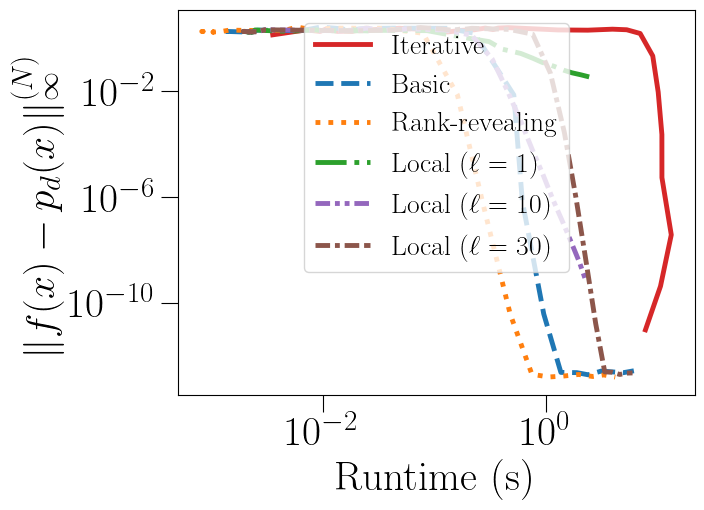

In [18]:
# fmt: off
def plot_benchmark_lagrange(ax):
    ax.loglog(read_field(data_d_o, "time"), read_field(data_d_o, "error"), **STYLE_ITER, label="Iterative")
    ax.loglog(read_field(data_d, "time_basic"), read_field(data_d, "error_basic"), **STYLE_BASIC, label="Basic")
    ax.loglog(read_field(data_d, "time_rr"), read_field(data_d, "error_rr"), **STYLE_RR, label="Rank-revealing"),
    ax.loglog(read_field(data_d, "time_local_1"), read_field(data_d, "error_local_1"), **STYLE_LOCAL_1, label=r"Local ($\ell=1$)")
    ax.loglog(read_field(data_d, "time_local_10"), read_field(data_d, "error_local_10"), **STYLE_LOCAL_10, label=r"Local ($\ell=10$)")
    ax.loglog(read_field(data_d, "time_local_30"), read_field(data_d, "error_local_30"), **STYLE_LOCAL_30, label=r"Local ($\ell=30$)")
    ax.set_xlabel("Runtime (s)")
    ax.legend(fontsize=20, loc='upper center')

if SHOW_FIGURES:
	fig, ax = create_subplots()
	ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")
	plot_benchmark_lagrange(ax)

<>:23: SyntaxWarning: invalid escape sequence '\V'
<>:23: SyntaxWarning: invalid escape sequence '\V'
/tmp/ipykernel_239848/2524876433.py:23: SyntaxWarning: invalid escape sequence '\V'
  ax.set_ylabel("$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")


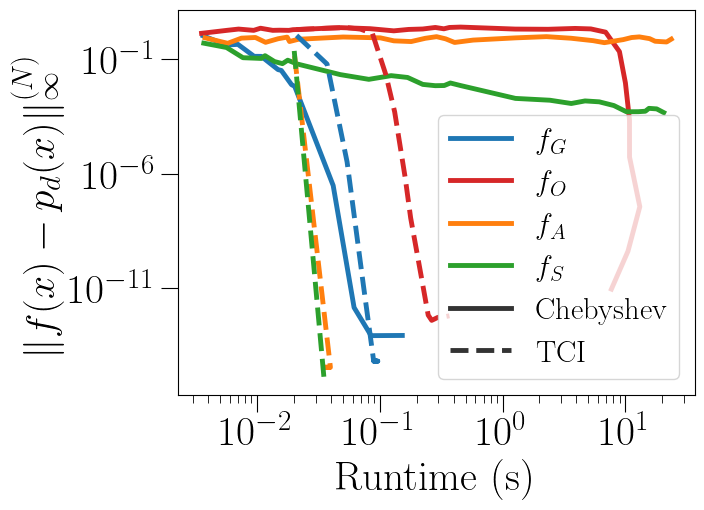

In [19]:
# fmt: off
import matplotlib.lines as mlines
def plot_benchmark_tci_time(ax):
    ax.loglog(read_field(data_d_g, "time"), read_field(data_d_g, "error"), **STYLE_G_CHEB, label=r"$f_G$")
    ax.loglog(read_field(data_d_o, "time"), read_field(data_d_o, "error"), **STYLE_O_CHEB, label=r"$f_O$")
    ax.loglog(read_field(data_d_a, "time"), read_field(data_d_a, "error"), **STYLE_A_CHEB, label=r"$f_A$")
    ax.loglog(read_field(data_d_s, "time"), read_field(data_d_s, "error"), **STYLE_S_CHEB, label=r"$f_S$")
    ax.loglog(read_field(data_r_g, "mean_time"), read_field(data_r_g, "mean_error"), **STYLE_G_CROSS)
    ax.loglog(read_field(data_r_o, "mean_time"), read_field(data_r_o, "mean_error"), **STYLE_O_CROSS)
    ax.loglog(read_field(data_r_a, "mean_time"), read_field(data_r_a, "mean_error"), **STYLE_A_CROSS)
    ax.loglog(read_field(data_r_s, "mean_time"), read_field(data_r_s, "mean_error"), **STYLE_S_CROSS)
    handles, labels = ax.get_legend_handles_labels()
    line_cheb = mlines.Line2D([], [], color="black", alpha=0.8, marker=STYLE_A_CHEB["marker"], linestyle="solid")
    line_tci = mlines.Line2D( [], [], color="black", alpha=0.8, marker=STYLE_A_CROSS["marker"], linestyle="dashed")
    handles.extend([line_cheb, line_tci])
    labels.extend(["Chebyshev", "TCI"])
    ax.legend(handles=handles, labels=labels, fontsize=22, loc="lower right")

    
if SHOW_FIGURES:
	fig, ax = create_subplots()
	ax.set_xlabel("Runtime (s)")
	ax.set_ylabel("$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")
	plot_benchmark_tci_time(ax)

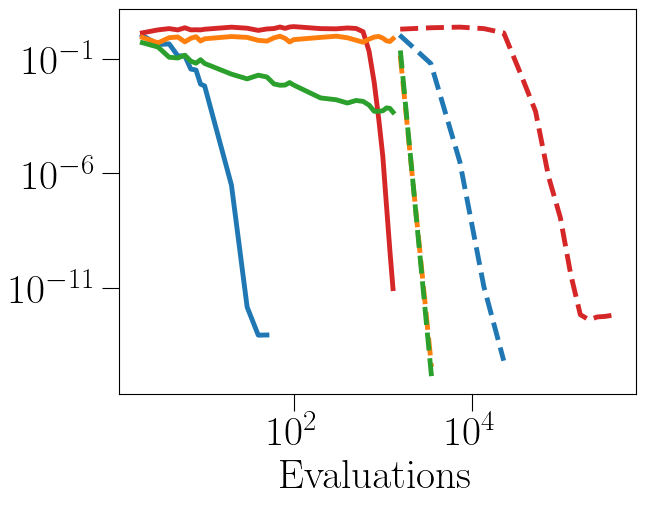

In [20]:
# fmt: off
def plot_benchmark_tci_evals(ax):
    ax.loglog(range_d_g, read_field(data_d_g, "error"), **STYLE_G_CHEB)
    ax.loglog(range_d, read_field(data_d_o, "error"), **STYLE_O_CHEB)
    ax.loglog(range_d, read_field(data_d_a, "error"), **STYLE_A_CHEB)
    ax.loglog(range_d, read_field(data_d_s, "error"), **STYLE_S_CHEB)
    ax.loglog(read_field(data_r_g, "mean_evals"), read_field(data_r_g, "mean_error"), **STYLE_G_CROSS)
    ax.loglog(read_field(data_r_o, "mean_evals"), read_field(data_r_o, "mean_error"), **STYLE_O_CROSS)
    ax.loglog(read_field(data_r_a, "mean_evals"), read_field(data_r_a, "mean_error"), **STYLE_A_CROSS)
    ax.loglog(read_field(data_r_s, "mean_evals"), read_field(data_r_s, "mean_error"), **STYLE_S_CROSS)
    

if SHOW_FIGURES:
	fig, ax = create_subplots()
	ax.set_xlabel("Evaluations")
	plot_benchmark_tci_evals(ax)

<>:29: SyntaxWarning: invalid escape sequence '\V'
<>:29: SyntaxWarning: invalid escape sequence '\V'
/tmp/ipykernel_239848/3273332952.py:29: SyntaxWarning: invalid escape sequence '\V'
  axs[0].set_ylabel("$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")


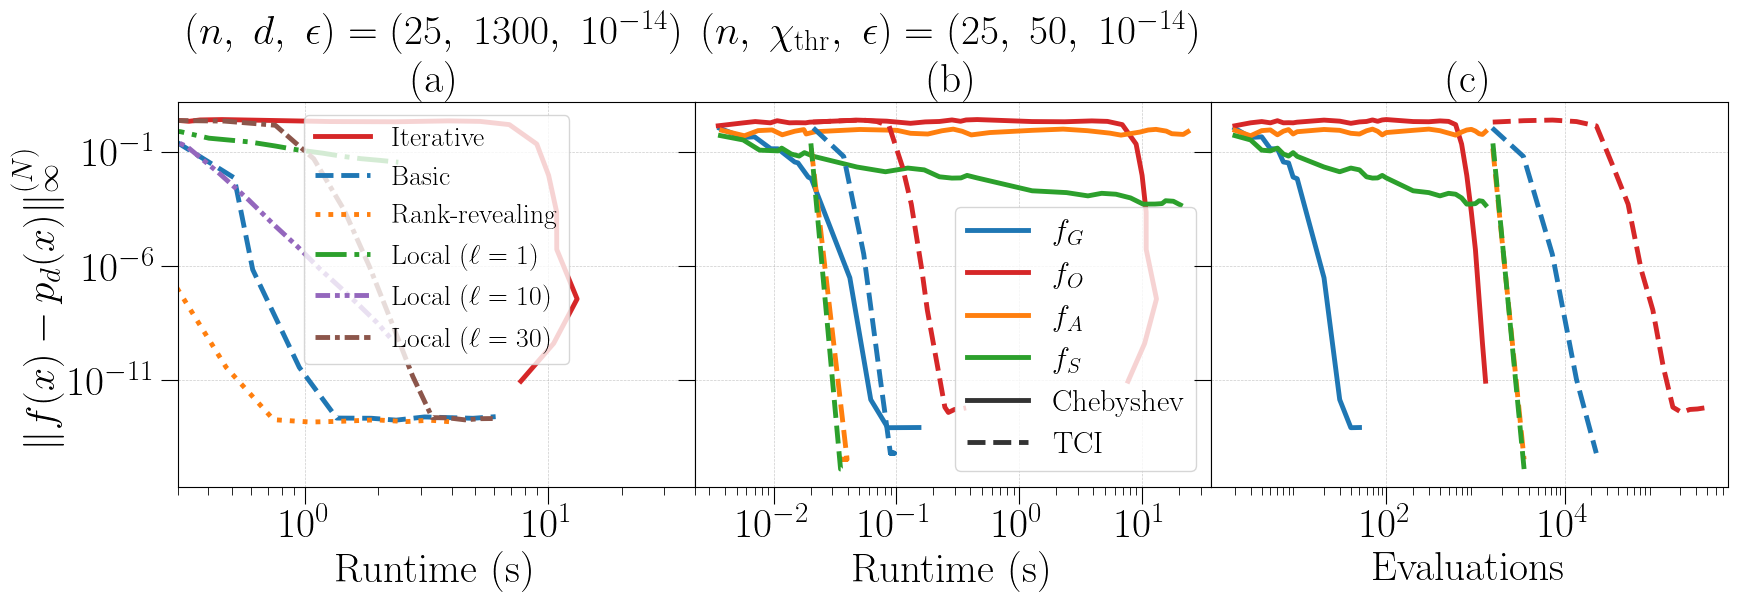

In [21]:
# fmt: off
from matplotlib import ticker
fig, axs = create_subplots(1, 3, sharey=True)

plot_benchmark_lagrange(axs[0])
plot_benchmark_tci_time(axs[1])
plot_benchmark_tci_evals(axs[2])

column_labels = [
    "Runtime (s)",
    "Runtime (s)",
    "Evaluations",
]
for ax, col in zip(axs, column_labels):
    ax.set_xlabel(col)

axs[0].set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

for i, ax in enumerate(axs.flat):
    ax.set_title(f"(" + chr(ord("a") + i) + ")")
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))


axs[0].set_title(r"$(n, \ d, \ \epsilon) = (25, \ 1300, \ 10^{-14})$" + "\n (a)")
axs[1].set_title(r"$(n, \ \chi_{\mathrm{thr}}, \ \epsilon) = (25, \ 50, \ 10^{-14})$" + "\n (b)")
axs[2].set_title("(c)")
axs[0].set_ylabel("$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")
axs[0].set_xlim((0.3, 40))

fig.subplots_adjust(wspace=0.0)
plt.savefig("figures/cheb_vs_lagrange_vs_cross.pdf", dpi=300, bbox_inches="tight")